**Machine Learning Data Cleaning and Feature Selection**

**Problem Statement:**

Title: Predicting Quality of Sleep for Individuals

Background:
Quality of sleep is a crucial factor influencing overall well-being, physical health, and mental performance. Understanding the factors that contribute to a good night's sleep can help individuals make informed lifestyle choices to improve their sleep quality.

Objective:
The goal of this project is to build a regression model that accurately predicts the quality of sleep for individuals based on various features and lifestyle factors.

Dataset:
The dataset consists of information collected from individuals, including demographic details, daily habits, and health-related metrics. The target variable is the self-reported quality of sleep, measured on a scale from 1 to 10.

Features:

Age
Sleep duration
Physical activity level
Stress level
Heart rate
Daily steps
Gender
Occupation
BMI category

Tasks:

Explore and preprocess the dataset, handling missing values, outliers, and encoding categorical variables.
Split the dataset into training and testing sets.
Build a regression model to predict the quality of sleep.
Evaluate the model's performance using metrics such as Mean Absolute Error, Mean Squared Error, and R-squared.
Interpret the importance of different features in influencing sleep quality.
Expected Outcome:
The developed regression model should provide accurate predictions of sleep quality, allowing individuals to understand the impact of various lifestyle factors on their sleep and make informed decisions to enhance overall well-being.


In [112]:
# installing dependencies
#!pip install eli5
%matplotlib inline
import pandas as pd #library for data analysis
import numpy as np #numerical python library to perform scientific calculations
import seaborn as sns #library for statistical plotting
import matplotlib.pyplot as plt
import math #to perform math functions

StressandSleep = pd.read_csv('https://raw.githubusercontent.com/Divi1393/barathwaaj_diviya_2445921_DSEM_assignments/main/SleepQuality.csv') #read the data file
StressandSleep.head(10) #display the first 10 enteries of the dataset to check the column enteries and names

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


**Data Preprocessing**
Data preprocessing is an essential phase in preparing the dataset for analysis, ensuring that it is suitable for machine learning or statistical modeling. In the context of this dataset, preprocessing involves several key steps. Firstly, addressing missing values in variables like sleep duration or stress level through techniques such as imputation or deletion ensures the dataset's completeness. Standardizing or normalizing numerical features like blood pressure or heart rate helps to bring them to a common scale, avoiding the dominance of certain variables in the analysis.

Categorical variables, such as gender or BMI category, may undergo encoding to convert them into a numerical format understandable by machine learning algorithms. Outlier detection and treatment are critical to maintaining data integrity, especially in numerical features like age or daily steps. Additionally, creating dummy variables for categorical features with multiple levels can enhance model performance. Data preprocessing is an iterative process, where each step contributes to refining the dataset, making it ready for meaningful analysis and generating insights into the complex relationships within health-related variables.

### **Identifying data types present in our dataset**

First data type not equal to object is identified and then data_types includes the column for which the condition is true. This results in subset of columns with numerical columns.

Similarly for categorical columns boolean mask of data_types is equal to object is compared resulting in categorical columns.

Index is used to extract the column names and assign it to the variables accordingly.





In [113]:
# Find the data types of each column
data_types = StressandSleep.dtypes

# Separate columns into numerical and categorical. .
numerical_columns = data_types[data_types != 'object'].index
categorical_columns = data_types[data_types == 'object'].index

# Display the number of numerical and categorical columns
print(f"Number of Numerical Columns: {len(numerical_columns)}")
print(f"Number of Categorical Columns: {len(categorical_columns)}")

# Display the list of numerical and categorical columns
print("\nNumerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Number of Numerical Columns: 8
Number of Categorical Columns: 5

Numerical Columns:
Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')

Categorical Columns:
Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder'],
      dtype='object')


### **Are there any missing values in our data**

Being aware of missing values is a fundamental aspect of data exploration and preparation. It ensures that the subsequent analyses and modeling processes are based on reliable, complete, and representative data, leading to more accurate and trustworthy results. Missing values can be very crucious for several reasons such as:

*   **Data integrity** (data being inaccurate or biased)
* **Statistical validity** (incorrect estimations,std errors, pvalues impacting the reliability of the statistical tests)
* **Model Performance** (Most ML algorithms cannot handle missing values so we need to impute or remove missing values)




In [114]:
StressandSleep.info() #Understand the dataset that we re working with-provides info0rmation about the dataframe such as data types of each column, number of null values and the memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [115]:
null_values = StressandSleep.isnull().sum() #check for null values
print("Null Values in each column:\n", null_values) #Displaying the result

Null Values in each column:
 Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [116]:
#Checking for unique varibales in categorical columns
StressandSleep[categorical_columns].nunique()

Gender             2
Occupation        11
BMI Category       4
Blood Pressure    25
Sleep Disorder     3
dtype: int64

In [117]:
StressandSleep['Gender'].value_counts() #used to count the occurrences of unique values in the 'Gender' column
#value_counts() method is then applied to the 'Gender' column to count the occurrences of each unique value in that column.

Male      189
Female    185
Name: Gender, dtype: int64

In [118]:
StressandSleep['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [119]:
StressandSleep['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

In [120]:
StressandSleep['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

Sleep disorder is a categorical variable as it represents distinct classes such as "None," "Insomnia," or "Sleep Apnea." Categorizing sleep disorders is based on qualitative distinctions, making it inappropriate to impute missing values using mode imputation, which relies on the most frequent category. Imputing sleep disorder based on mode would oversimplify the complexity of sleep conditions, potentially leading to inaccurate representations of individuals' actual sleep-related challenges. Hence removing sleep disorder colum.

In [121]:
df1=StressandSleep.drop(columns=['Sleep Disorder'])
df1.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps'],
      dtype='object')

In [122]:
#Checking for null values again
df1.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
dtype: int64

There are no null or missing values in our data. So we can remove some data and perform imputation. The imputation method is chosen based on the data type of each column. For numeric columns (float64 and int64), it uses mean or median. Because and for object or categorical columns, it uses the mode.

In [123]:
# Assuming 'original_df' is your original DataFrame
# Replace this with your actual DataFrame or read data from a file

original_df = pd.DataFrame(df1)

# Create a copy of the original DataFrame
imputed_df = original_df.copy()

# Impute missing values randomly based on mean, median, or mode
for column in imputed_df.columns:
    # Generate random indices for missing values
    random_indices = imputed_df[column].isnull()

    # Impute based on mean, median, or mode
    if imputed_df[column].dtype == 'float64':
        imputed_values = imputed_df[column].mean()
    elif imputed_df[column].dtype == 'int64':
        imputed_values = imputed_df[column].median()
    else:
        imputed_values = imputed_df[column].mode().iloc[0]

    # Replace missing values with imputed values
    imputed_df.loc[random_indices, column] = imputed_values

# Display the original and imputed DataFrames
print("Original DataFrame:")
print(original_df)
print("\nImputed DataFrame:")
print(imputed_df)

Original DataFrame:
     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight 

In [124]:
imputed_df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1.0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200
1,2.0,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
2,3.0,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
3,4.0,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
4,5.0,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
5,6.0,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000
6,7.0,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500
7,8.0,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000
8,9.0,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000
9,10.0,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000


### **Distribution of Numeric Variables**

It is important to find out the likely distribution of numeric variables because it helps us in understanding the characteristics of our data and fundemental in making informed decsions based on the data.
* It will help us to ensure if the data meets the assumptions resulting in accurate models.
* We can tailor our visualizations based on whether the data is normally distributed or skewed.
* Helps us in deciding the choice of statistical test that we would like to perform.
* Important in making feature engineering decisions.
* Provides insights into range and spred of values.
* Distribution of target variables is crucial for selecting appropriate algorithms, setting hyperparameters, and optimizing model performance.

**Data visualizations using Histograms, box plots and pie charts.**

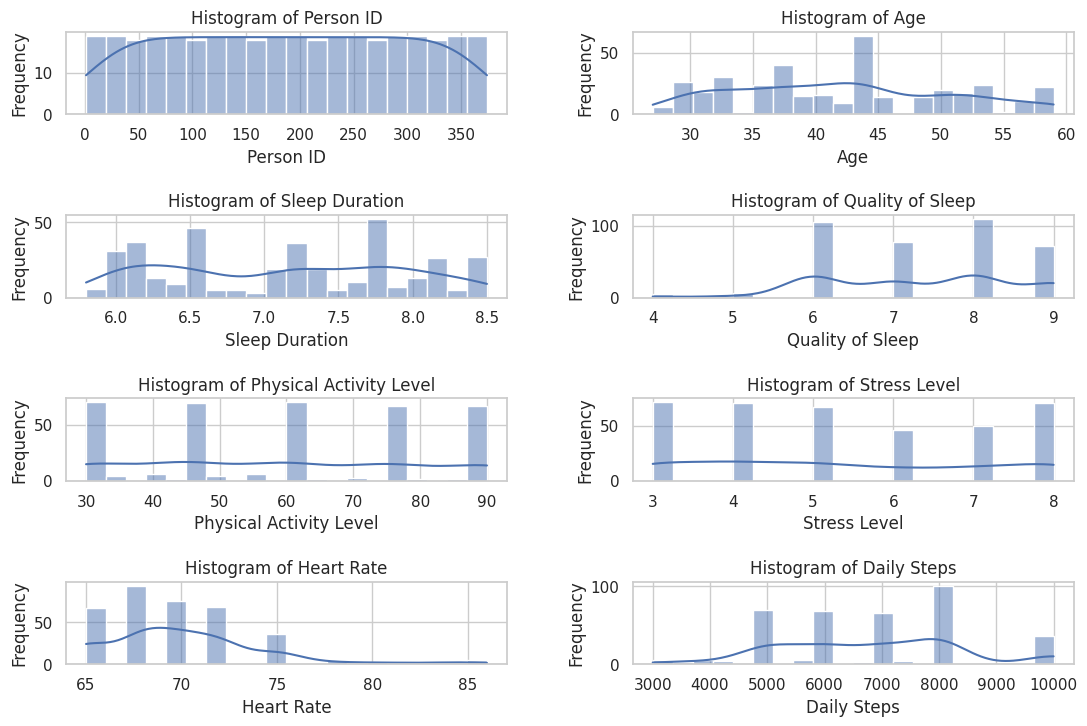

In [125]:
df2 = pd.DataFrame(imputed_df)
# Select numerical columns for histograms
numerical_columns = df2.select_dtypes(include=['int64', 'float64']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_columns) // 2, ncols=2, figsize=(12, 2 * len(numerical_columns) // 2))
fig.tight_layout(pad=4.0)  # Adjust the spacing between subplots

# Create side-by-side histograms for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(df2[column], bins=20, kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Histogram of {column}')
    axes[i // 2, i % 2].set_xlabel(column)
    axes[i // 2, i % 2].set_ylabel('Frequency')

plt.show()

Histogram Interpretation:



* Histogram of Age: The distribution is left-skewed, which means that there are more people in the younger age groups than in the older age groups. The peak of the distribution is in the 25-27.5 age group, and there are fewer and fewer people as the age increases.

* Histogram of Sleep Duration: There are more people who slept for a shorter duration than people who slept for a longer duration. The peak of the distribution is around 7.5 hours, and there are fewer and fewer people as the sleep duration decreases




**BOX PLOTS**


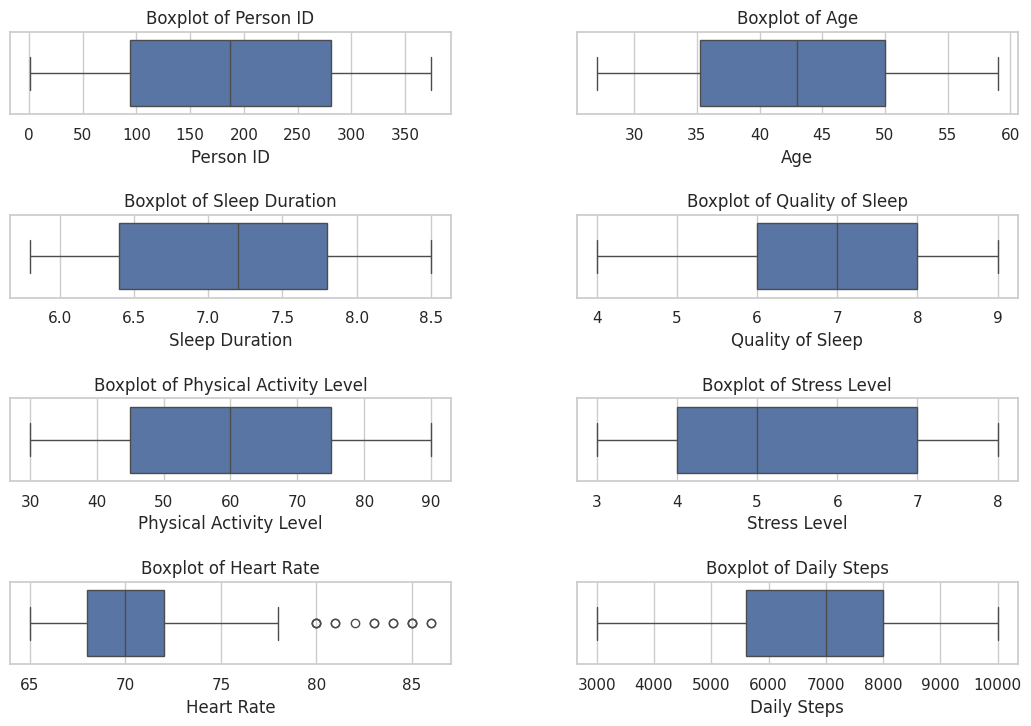

In [126]:
# Set the style
sns.set(style="whitegrid")

# Select numerical columns for boxplots
numerical_columns = df2.select_dtypes(include=['int64', 'float64']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_columns) // 2, ncols=2, figsize=(12, 2 * len(numerical_columns) // 2))
fig.tight_layout(pad=4.0)  # Adjust the spacing between subplots

# Create side-by-side boxplots with outliers for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df2[column], showfliers=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Boxplot of {column}')
    axes[i // 2, i % 2].set_xlabel(column)

plt.show()

**OUTLIERS REMOVAL USING Z-SCORE METHOD**

Outliers are defined as the values outisde a certain number of standard deviations from the mean.

When outliers are present in a boxplot, it's important to consider how to handle them based on the goals of your analysis and the nature of your data.

* I have tried  to find out mean and standard deviation to identify the central tendency and spread of Heart Rate data.
* Next, I have calculated the lower and upper bounds for outlier detection. i have set the bounds as ±2 standard deviations from mean. Values beyond this are considered potential outliers.
* Created a new dataframe containing only thr rows where 'Heart Rate' values will fall within the calculated bounds. Hence removing the outliers.

Lower Bound : 61.8944243308451
Upper Bound : 78.43712647129395


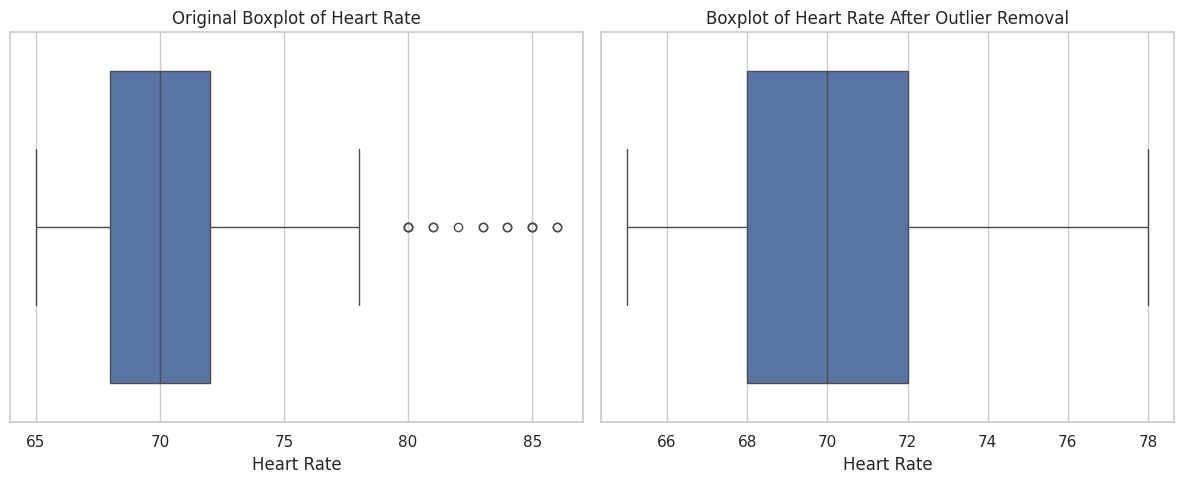

In [127]:
# Original Boxplot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df2['Heart Rate'])
plt.title('Original Boxplot of Heart Rate')

# Calculate summary statistics
mean = df2['Heart Rate'].mean()
std = df2['Heart Rate'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std * 2
upper_bound = mean + std * 2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
df2_cleaned = df2[(df2['Heart Rate'] >= lower_bound) & (df2['Heart Rate'] <= upper_bound)]

# Boxplot after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df2_cleaned['Heart Rate'])
plt.title('Boxplot of Heart Rate After Outlier Removal')

plt.tight_layout()
plt.show()

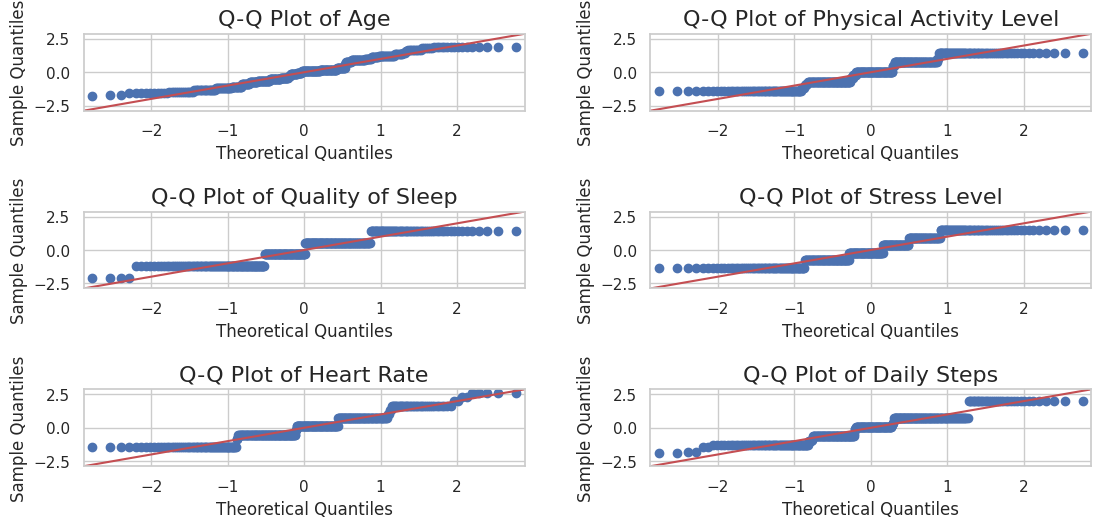

In [128]:
# Checking the distribution of independent variables using Q-Q plots
from statsmodels.graphics.gofplots import qqplot

data_norm = df2_cleaned[["Age", "Physical Activity Level", "Quality of Sleep", "Stress Level", "Heart Rate", "Daily Steps"]]

# Set up subplots
fig, axes = plt.subplots(nrows=len(data_norm.columns) // 2, ncols=2, figsize=(12, 2 * len(data_norm.columns) // 2))
fig.tight_layout(pad=4.0)  # Adjust the spacing between subplots

# Create side-by-side Q-Q plots for each independent variable
for i, c in enumerate(data_norm.columns):
    qqplot(data_norm[c], line="45", fit=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Q-Q Plot of {c}', fontsize=16)
    axes[i // 2, i % 2].grid(True)

plt.show()

### **From the q-q plots we can infer that the independent numerical variables more or less follow normal distribution.**

**Handling Categorical Columns**

In [129]:
print('Occupation:', df2_cleaned['Occupation'].unique())
print('\nBMI Category:', df2_cleaned['BMI Category'].unique())

Occupation: ['Software Engineer' 'Doctor' 'Nurse' 'Engineer' 'Accountant' 'Scientist'
 'Teacher' 'Lawyer' 'Salesperson' 'Manager']

BMI Category: ['Overweight' 'Normal' 'Normal Weight']


In [130]:
df2_cleaned['BMI Category'].value_counts()

Normal           195
Overweight       145
Normal Weight     19
Name: BMI Category, dtype: int64

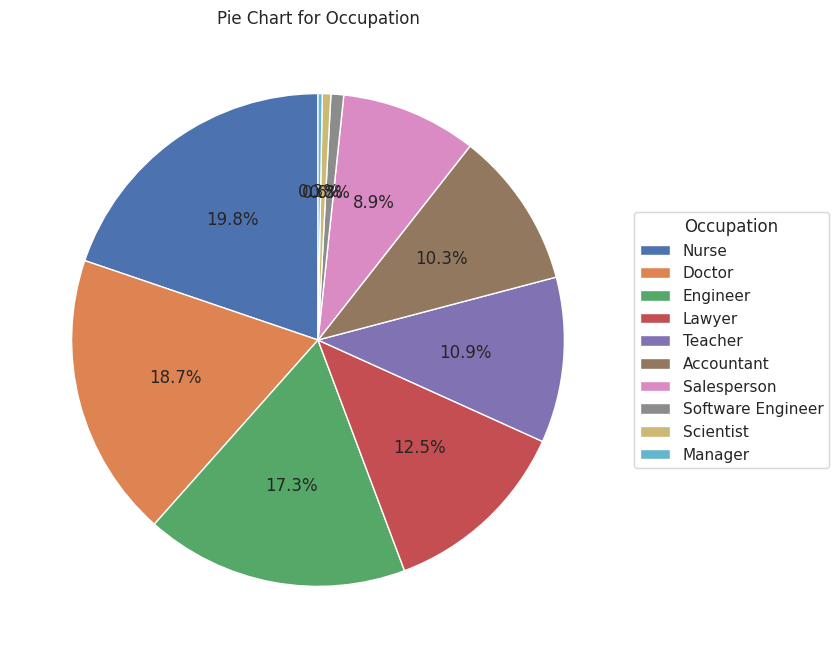

In [131]:
plt.figure(figsize=(8, 8))
plt.pie(df2_cleaned['Occupation'].value_counts(), labels=None, autopct='%1.1f%%', startangle=90)
plt.legend(labels=df2_cleaned['Occupation'].value_counts().index, title='Occupation', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Pie Chart for Occupation')
plt.show()

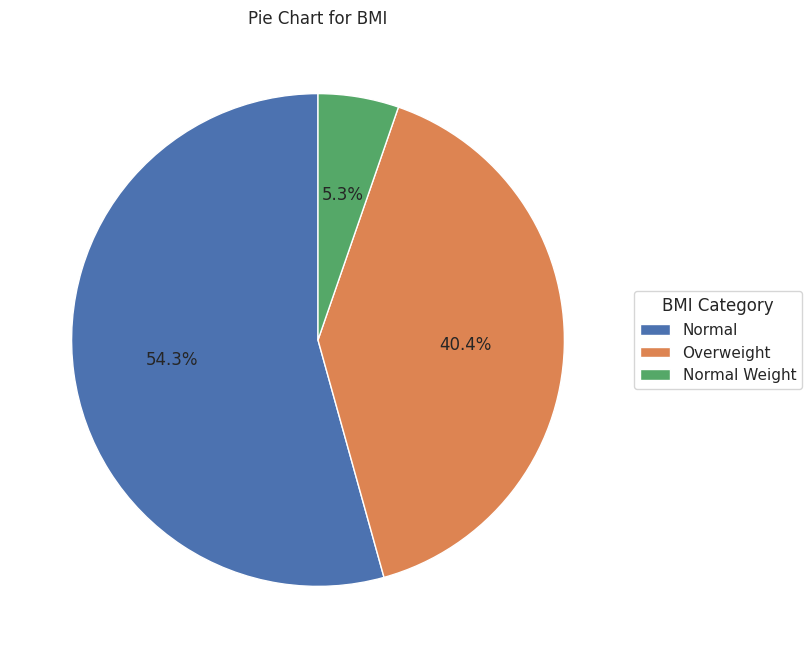

In [132]:
# Unique Values of BMI Category
plt.figure(figsize=(8, 8))
plt.pie(df2_cleaned['BMI Category'].value_counts(), labels=None, autopct='%1.1f%%', startangle=90)
plt.legend(labels=df2_cleaned['BMI Category'].value_counts().index, title='BMI Category', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Pie Chart for BMI')
plt.show()

Handling Blood pressure Column: BP is typically represented as two numerical values separated by a slash, such as "129/60." The first number is the systolic blood pressure(upper value), representing the pressure in the arteries when the heart beats, and the second number is the diastolic blood pressure(lower value), representing the pressure in the arteries when the heart is at rest between beats.

The dual-column representation also facilitates statistical analysis and visualization, allowing you to explore trends, correlations, and distributions of systolic and diastolic blood pressure values independently.

In [133]:
df2_cleaned.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1.0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200
1,2.0,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
2,3.0,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
7,8.0,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000
8,9.0,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000


In [134]:
df2_cleaned['Blood Pressure'].unique()


array(['126/83', '125/80', '120/80', '130/86', '117/76', '118/76',
       '128/85', '128/84', '115/75', '129/84', '130/85', '115/78',
       '119/77', '121/79', '125/82', '135/90', '122/80', '140/95',
       '118/75'], dtype=object)

In [135]:
df2_cleaned = pd.concat([df2_cleaned, df2_cleaned['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df2_cleaned

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,0,1
0,1.0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83
1,2.0,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
2,3.0,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
7,8.0,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,120,80
8,9.0,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,120,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370.0,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95
370,371.0,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,140,95
371,372.0,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95
372,373.0,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95


In [136]:
df2_cleaned= df2_cleaned.rename(columns={0: 'BloodPressure_Upper_Value', 1: 'BloodPressure_Lower_Value'})
df2_cleaned.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,1.0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83
1,2.0,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
2,3.0,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
7,8.0,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,120,80
8,9.0,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,120,80


**One Hot Encoding**

One-hot encoding is a technique used in machine learning and data preprocessing to represent categorical variables with numerical values. It is applied when working with algorithms or models that require numerical input, and it is particularly useful for nominal categorical variables (categories with no inherent order). One-hot encoding transforms categorical variables into a format that can be effectively used by machine learning models.

In [137]:
#One Hot Encoding of Categorical Columns

# Perform one-hot encoding using pandas get_dummies
df1_encoded = pd.get_dummies(df2_cleaned, columns=['Gender', 'Occupation', 'BMI Category'])

# Display the first few rows of the encoded DataFrame
print(df1_encoded.head())

   Person ID  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0        1.0   27             6.1                 6                       42   
1        2.0   28             6.2                 6                       60   
2        3.0   28             6.2                 6                       60   
7        8.0   29             7.8                 7                       75   
8        9.0   29             7.8                 7                       75   

   Stress Level  Heart Rate  Daily Steps BloodPressure_Upper_Value  \
0             6          77         4200                       126   
1             8          75        10000                       125   
2             8          75        10000                       125   
7             6          70         8000                       120   
8             6          70         8000                       120   

  BloodPressure_Lower_Value  ...  Occupation_Lawyer  Occupation_Manager  \
0                      

**The independent variables that are highly useful to predict target variables can be predicted by different methods.**
* **Correlation Matrix**: Calculate the correlation coefficients between each independent variable and the target variable. Higher absolute values of correlation indicate stronger relationships. Positive correlation signifies a positive impact, while negative correlation implies a negative impact on the target variable.


In [138]:
print(df1_encoded.head(5))

   Person ID  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0        1.0   27             6.1                 6                       42   
1        2.0   28             6.2                 6                       60   
2        3.0   28             6.2                 6                       60   
7        8.0   29             7.8                 7                       75   
8        9.0   29             7.8                 7                       75   

   Stress Level  Heart Rate  Daily Steps BloodPressure_Upper_Value  \
0             6          77         4200                       126   
1             8          75        10000                       125   
2             8          75        10000                       125   
7             6          70         8000                       120   
8             6          70         8000                       120   

  BloodPressure_Lower_Value  ...  Occupation_Lawyer  Occupation_Manager  \
0                      

In [139]:
# checking the correlation between all the features in the data
df1_encoded.corr()

<ipython-input-139-73d9d33e7a6a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1_encoded.corr()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Female,Gender_Male,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Overweight
Person ID,1.000000,0.990037,0.263134,0.390001,0.109790,-0.366938,-0.191564,-0.013341,0.616335,-0.616335,...,-0.124682,0.036282,0.525125,0.081245,-0.084793,-0.112439,0.033678,-0.515691,-0.093523,0.566197
Age,0.990037,1.000000,0.315749,0.439260,0.142077,-0.397676,-0.193177,0.003712,0.627738,-0.627738,...,-0.126518,0.015804,0.577935,0.040106,-0.082084,-0.107791,-0.015336,-0.500573,-0.084149,0.546573
Sleep Duration,0.263134,0.315749,1.000000,0.889815,0.174076,-0.801368,-0.612842,-0.086963,0.131019,-0.131019,...,0.125350,-0.016701,-0.044450,-0.295645,-0.089987,-0.013511,-0.198715,0.337225,0.081250,-0.379420
Quality of Sleep,0.390001,0.439260,0.889815,1.000000,0.127943,-0.908132,-0.721403,-0.093540,0.323473,-0.323473,...,0.187555,-0.017669,0.026738,-0.382685,-0.091563,-0.003486,-0.116709,0.276758,0.064763,-0.310512
Physical Activity Level,0.109790,0.142077,0.174076,0.127943,1.000000,0.012020,0.256545,0.820730,0.002468,-0.002468,...,0.205769,-0.011702,0.479931,-0.219869,-0.034590,-0.024745,-0.232441,-0.100091,0.032718,0.086683
Stress Level,-0.366938,-0.397676,-0.801368,-0.908132,0.012020,1.000000,0.823647,0.249656,-0.418940,0.418940,...,-0.060406,-0.010430,0.044705,0.292880,0.027652,-0.000773,-0.175444,-0.135961,-0.046653,0.159313
Heart Rate,-0.191564,-0.193177,-0.612842,-0.721403,0.256545,0.823647,1.000000,0.318414,-0.218090,0.218090,...,-0.073858,0.087966,0.330087,0.229816,0.147773,0.076923,-0.301143,-0.304592,0.054133,0.284520
Daily Steps,-0.013341,0.003712,-0.086963,-0.093540,0.820730,0.249656,0.318414,1.000000,-0.023853,0.023853,...,0.227772,-0.050550,0.402613,-0.195742,-0.071589,-0.012911,-0.213707,-0.042398,0.017503,0.035056
Gender_Female,0.616335,0.627738,0.131019,0.323473,0.002468,-0.418940,-0.218090,-0.023853,1.000000,-1.000000,...,-0.362797,0.052705,0.495135,-0.313697,0.074640,-0.092055,0.276523,-0.377697,0.061551,0.355351
Gender_Male,-0.616335,-0.627738,-0.131019,-0.323473,-0.002468,0.418940,0.218090,0.023853,-1.000000,1.000000,...,0.362797,-0.052705,-0.495135,0.313697,-0.074640,0.092055,-0.276523,0.377697,-0.061551,-0.355351


<ipython-input-140-f58c3e11cbff>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1_encoded.corr(), annot=True, cmap="coolwarm")


<Axes: >

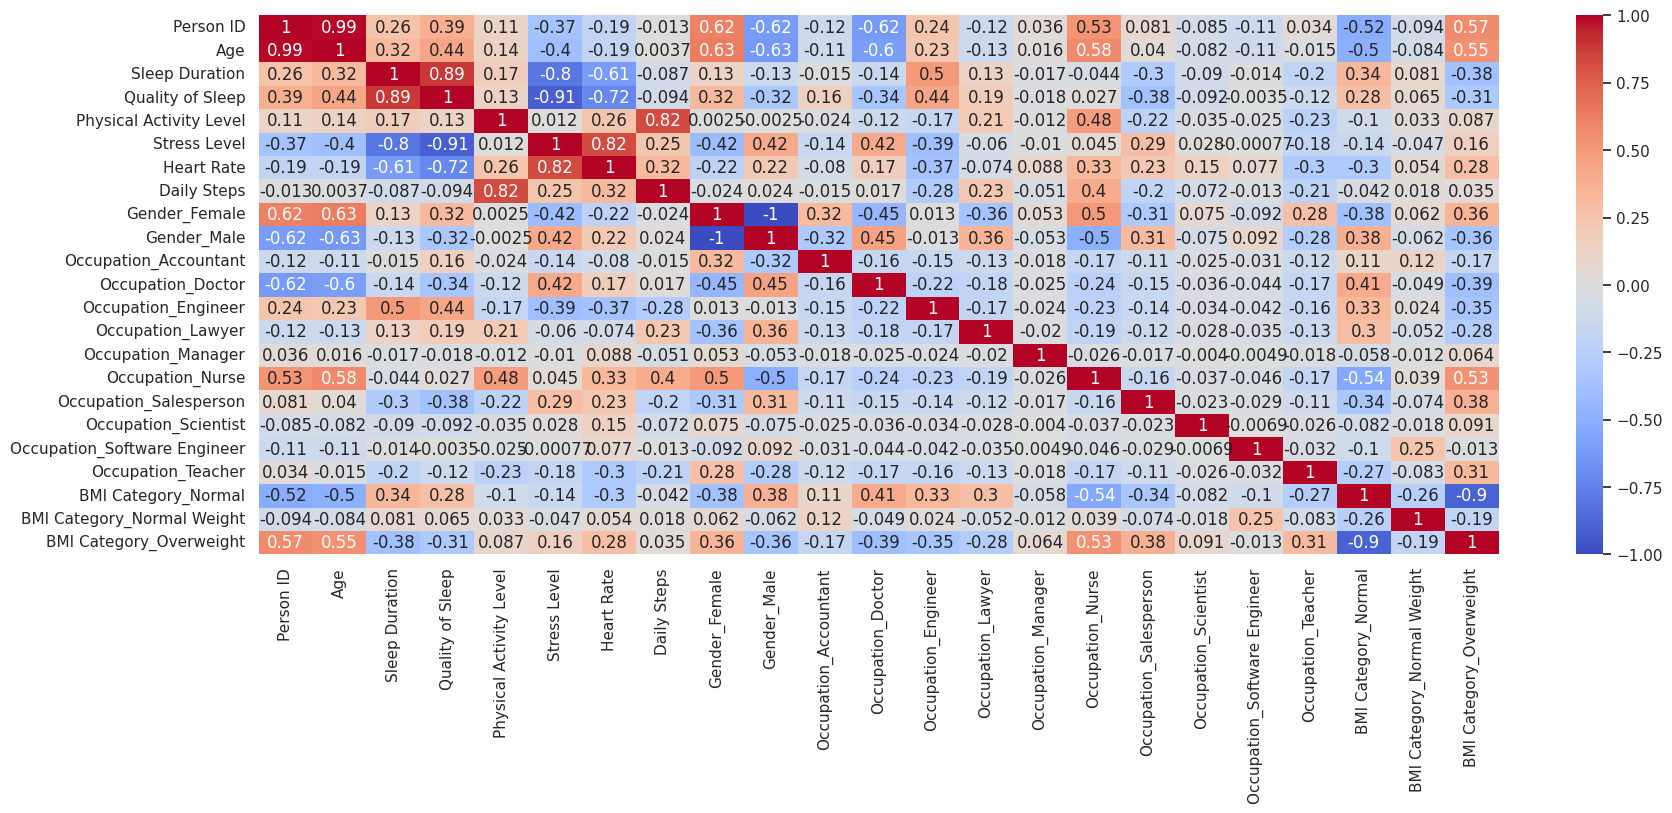

In [140]:
# the heat map of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(df1_encoded.corr(), annot=True, cmap="coolwarm")

There is not much correlation between the variables.

---



### **Significance of Predictors**

In [141]:
# Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(
    df1_encoded["Quality of Sleep"],
    df1_encoded[
        [
            "Age",
            "Sleep Duration",
            "Physical Activity Level",
            "Stress Level",
            "Heart Rate",
            "Daily Steps",
            "Gender_Female",
            "Gender_Male",
            "Occupation_Accountant",
            "Occupation_Doctor",
            "Occupation_Engineer",
            "Occupation_Lawyer",
            "Occupation_Manager",
            "Occupation_Nurse",
            "Occupation_Salesperson",
            "Occupation_Scientist",
            "Occupation_Software Engineer",
            "Occupation_Teacher",
            "BMI Category_Normal",
            "BMI Category_Normal Weight",
            "BMI Category_Overweight"
        ]
    ],
).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Quality of Sleep   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     622.4
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          9.48e-248
Time:                        05:10:41   Log-Likelihood:                 81.098
No. Observations:                 359   AIC:                            -124.2
Df Residuals:                     340   BIC:                            -50.41
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Age                              0.0547      0.004     14.225      0.000       0.047       0.062
Sleep Duration                   0.2886      0.042      6.906      0.000       0.206       0.371
Physical Activity Level         -0.0031      0.001     -2.327      0.021      -0.006      -0.000
Stress Level                    -0.3834      0.026    -14.537      0.000      -0.435      -0.332
Heart Rate                      -0.0066      0.010     -0.687      0.492      -0.026       0.012
Daily Steps                    3.62e-05    1.6e-05      2.257      0.025    4.66e-06    6.77e-05
Gender_Female                    2.6786      0.353      7.583      0.000       1.984       3.373
Gender_Male                      3.2456      0.338      9.605      0.000       2.581       3.910
Occupation_Accountant            1.0266      0.074     13.825      0.000       0.881       1.173
Occupation_Doctor                0.4175      0.090      4.645      0.000       0.241       0.594
Occupation_Engineer              0.3182      0.094      3.393      0.001       0.134       0.503
Occupation_Lawyer                0.5474      0.097      5.653      0.000       0.357       0.738
Occupation_Manager               0.6775      0.211      3.214      0.001       0.263       1.092
Occupation_Nurse                 0.7697      0.093      8.318      0.000       0.588       0.952
Occupation_Salesperson           0.0321      0.090      0.359      0.720      -0.144       0.208
Occupation_Scientist             0.9099      0.167      5.434      0.000       0.581       1.239
Occupation_Software Engineer     0.7932      0.139      5.694      0.000       0.519       1.067
Occupation_Teacher               0.4321      0.061      7.097      0.000       0.312       0.552
BMI Category_Normal              2.2172      0.225      9.840      0.000       1.774       2.660
BMI Category_Normal Weight       2.1286      0.232      9.158      0.000       1.671       2.586
BMI Category_Overweight          1.5784      0.239      6.597      0.000       1.108       2.049
==============================================================================
Omnibus:                       99.592   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1638.924
Skew:                          -0.661   Prob(JB):                         0.00
Kurtosis:                      13.384   Cond. No.                     7.86e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.93e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We can infer that

* R-squared (R²) measures the proportion of the variance in the dependent variable that is explained by the independent variables. In this case, R-squared is 0.971, indicating that approximately 97.1% of the variability in "Quality of Sleep" is explained by the independent variables.
* Adjusted R-squared accounts for the number of predictors in the model. A high adjusted R-squared (0.969) suggests that the model is fitting well without overfitting.
* The coefficients represent the estimated effect of each independent variable on the dependent variable. For example, the coefficient for "Age" is 0.0547, suggesting that, holding other variables constant, a one-unit increase in age is associated with a 0.0547 increase in the predicted "Quality of Sleep."
* The p-values associated with each coefficient test the null hypothesis that the corresponding coefficient is equal to zero. If the p-value is small (typically < 0.05), you reject the null hypothesis, indicating that the variable is likely a meaningful predictor. For instance, "Gender_Female," "Gender_Male," and other occupation and BMI categories have p-values close to zero, suggesting their significance.

## **The predictor variables that are the most important are:**

**Age, sleep duration, stress level, gender, occupation, bmi**





In [142]:
# Calculate the correlation of "Quality of Sleep" with other predictor variables
correlation_with_quality_of_sleep = df1_encoded.corr()['Quality of Sleep'].drop('Quality of Sleep')

# Display the correlation values
print("Correlation with Quality of Sleep:")
print(correlation_with_quality_of_sleep)

Correlation with Quality of Sleep:
Person ID                       0.390001
Age                             0.439260
Sleep Duration                  0.889815
Physical Activity Level         0.127943
Stress Level                   -0.908132
Heart Rate                     -0.721403
Daily Steps                    -0.093540
Gender_Female                   0.323473
Gender_Male                    -0.323473
Occupation_Accountant           0.155454
Occupation_Doctor              -0.344459
Occupation_Engineer             0.443432
Occupation_Lawyer               0.187555
Occupation_Manager             -0.017669
Occupation_Nurse                0.026738
Occupation_Salesperson         -0.382685
Occupation_Scientist           -0.091563
Occupation_Software Engineer   -0.003486
Occupation_Teacher             -0.116709
BMI Category_Normal             0.276758
BMI Category_Normal Weight      0.064763
BMI Category_Overweight        -0.310512
Name: Quality of Sleep, dtype: float64


<ipython-input-142-ce99ef6e27fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_quality_of_sleep = df1_encoded.corr()['Quality of Sleep'].drop('Quality of Sleep')


**Magnitude of Correlation:**
The magnitude of the correlation coefficient indicates the strength of the relationship. Values closer to **1 or -1 suggest a stronger correlation**, while **values closer to 0 suggest a weaker correlation**.

1. Strong Positive Correlation: Sleep Duration (0.889815) indicates strong positive correlation. As Sleep Duration increases, Quality of Sleep tends to increase.
2. Moderate Negative Correlation: Occupation_Doctor (-0.344459) indicates moderate negative correlation. Being a Doctor is associated with lower Quality of Sleep.
3. Strong Negative Correlation: Stress Level (-0.908132) indicates strong negative correlation. As Stress Level increases, Quality of Sleep tends to decrease.
4. Moderate Positive Correlation: Gender_Female (0.323473) indicates moderate positive correlation. Females may have a slightly higher Quality of Sleep compared to males.

<ipython-input-143-0ef702a68e12>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationmatrix = df.corr()


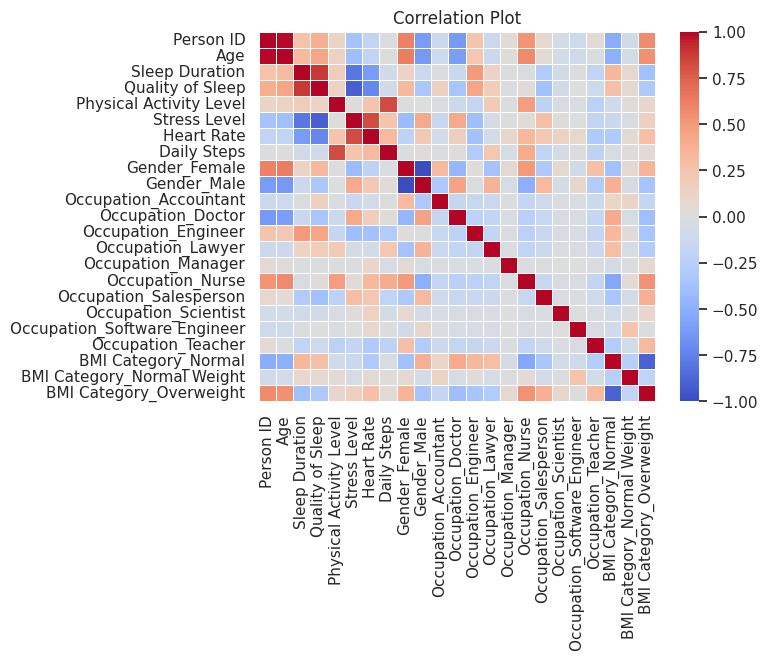

In [143]:
#Correlation Plot
df = pd.DataFrame(df1_encoded)
correlationmatrix = df.corr()
sns.heatmap(correlationmatrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

We can infer from the correlation plot that the most of the independant variables not that highly correlated.

<ipython-input-144-98c25aa3e329>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr_matrix = df.corr(method='pearson')


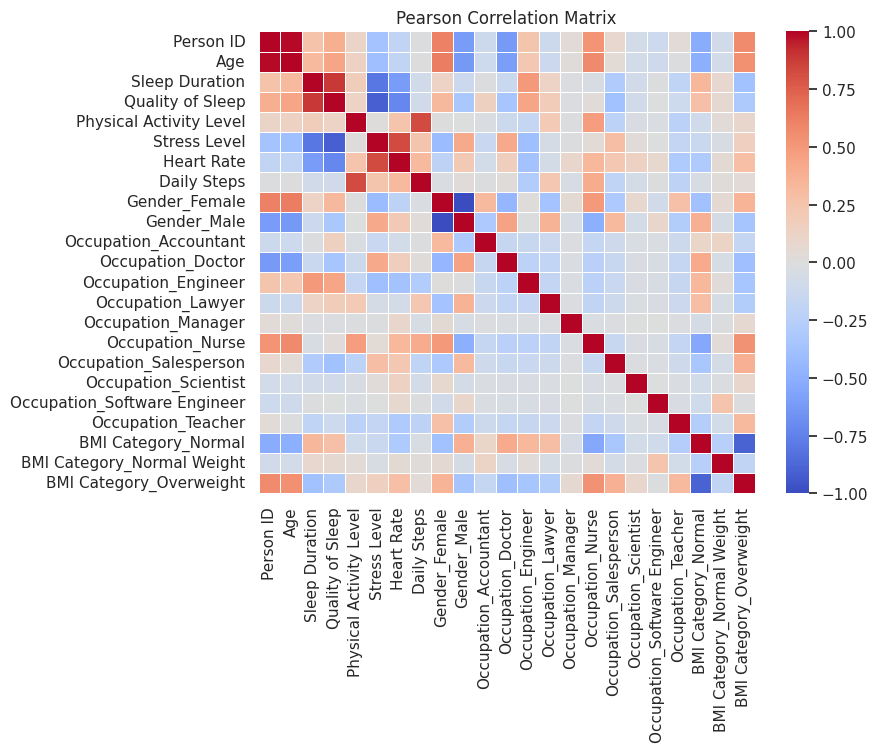

In [144]:
# Pearson Correlation Plot
df = pd.DataFrame(df1_encoded)
pearson_corr_matrix = df.corr(method='pearson')

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

### **Which independent variables have missing data? How much?**

None of the independent variables have missing data.

In [145]:
# Assuming df is your DataFrame
# Check for missing values
missing_values = df.isnull().sum()

# Filter variables with missing data
variables_with_missing_data = missing_values[missing_values > 0]

# Display results
print("Variables with Missing Data:")
print(variables_with_missing_data)

Variables with Missing Data:
Series([], dtype: int64)


### **Do the training and test sets have the same data?**

Yes, the majority of the data is consistent across the test, train, and validation datasets. However, the training set contains more data points, and some boundary values are not included in both the train and validation datasets.

I am splitting the data into train and test data inorder to assess a model's performance on unseen data, prevent overfitting, and enable unbiased evaluation of hyperparameter choices, ultimately ensuring the model's ability to generalize to new situations.


### **Do the ranges of the predictor variables make sense?**

* Indorder to answer this query we can check the descriptive statistcs for each predictor variable, including the mean, standard deviation, minimum, and maximum values. This provides insights into the central tendency and spread of the data.
* We can also try and find if there are outliers using Inter quartile range,This method calculates the lower and upper bounds based on the IQR and then identifies the outliers for the specified variable.

In [146]:
# Descriptive statistics to identify range of predictive variables.
descriptive_stats = df.describe()
print(descriptive_stats)

        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  359.000000  359.000000      359.000000        359.000000   
mean   190.610028   42.428969        7.149582          7.376045   
std    107.055270    8.609781        0.790936          1.126415   
min      1.000000   27.000000        5.900000          5.000000   
25%     99.500000   36.000000        6.450000          6.000000   
50%    191.000000   43.000000        7.200000          7.000000   
75%    284.500000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  \
count               359.000000    359.000000  359.000000    359.000000   
mean                 59.598886      5.348189   69.629526   6945.961003   
std                  20.799941      1.766760    3.231188   1513.894349   
min                  30.000000      3.000000   65.000000   4100.000000   
25%                  45.00

In [147]:
print(df[numerical_columns].head())

   Person ID  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0        1.0   27             6.1                 6                       42   
1        2.0   28             6.2                 6                       60   
2        3.0   28             6.2                 6                       60   
7        8.0   29             7.8                 7                       75   
8        9.0   29             7.8                 7                       75   

   Stress Level  Heart Rate  Daily Steps  
0             6          77         4200  
1             8          75        10000  
2             8          75        10000  
7             6          70         8000  
8             6          70         8000  


In [148]:
print(df[numerical_columns].isnull().sum())

Person ID                  0
Age                        0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
Heart Rate                 0
Daily Steps                0
dtype: int64


In [149]:
# Specify the variable for which you want to identify outliers
variable_of_interest = 'Quality of Sleep'

# Calculate quartiles and IQR
Q1 = df1_encoded[variable_of_interest].quantile(0.25)
Q3 = df1_encoded[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df1_encoded[(df1_encoded[variable_of_interest] < lower_bound) | (df1_encoded[variable_of_interest] > upper_bound)]

# Display the outliers
print("Outliers for {}: \n{}".format(variable_of_interest, outliers))

Outliers for Quality of Sleep: 
Empty DataFrame
Columns: [Person ID, Age, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, Heart Rate, Daily Steps, BloodPressure_Upper_Value, BloodPressure_Lower_Value, Gender_Female, Gender_Male, Occupation_Accountant, Occupation_Doctor, Occupation_Engineer, Occupation_Lawyer, Occupation_Manager, Occupation_Nurse, Occupation_Salesperson, Occupation_Scientist, Occupation_Software Engineer, Occupation_Teacher, BMI Category_Normal, BMI Category_Normal Weight, BMI Category_Overweight]
Index: []

[0 rows x 25 columns]


### **The output indicates that there are no outliers for the target variable Quality of Sleep. i.e. the values for "Quality of Sleep" are within a reasonable range without extreme deviations from the majority of the data.**

### **Train, Validate and Test Data**

In [150]:
#Test data and Train Data

#Before that I need to isolate the target variable from the rest.
X = df1_encoded.drop('Quality of Sleep', axis=1)  # X= Columns other than the 'Quality of Sleep' & y= 'Quality of Sleep'
y = df1_encoded['Quality of Sleep']

from sklearn.model_selection import train_test_split

X = df[
    [
            "Person ID",
            "Age",
            "Sleep Duration",
            "Physical Activity Level",
            "Stress Level",
            "Heart Rate",
            "Daily Steps",
            "Gender_Female",
            "Gender_Male",
            "Occupation_Accountant",
            "Occupation_Doctor",
            "Occupation_Engineer",
            "Occupation_Lawyer",
            "Occupation_Manager",
            "Occupation_Nurse",
            "Occupation_Salesperson",
            "Occupation_Scientist",
            "Occupation_Software Engineer",
            "Occupation_Teacher",
            "BMI Category_Normal",
            "BMI Category_Normal Weight",
            "BMI Category_Overweight"
    ]
]

y = df["Quality of Sleep"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

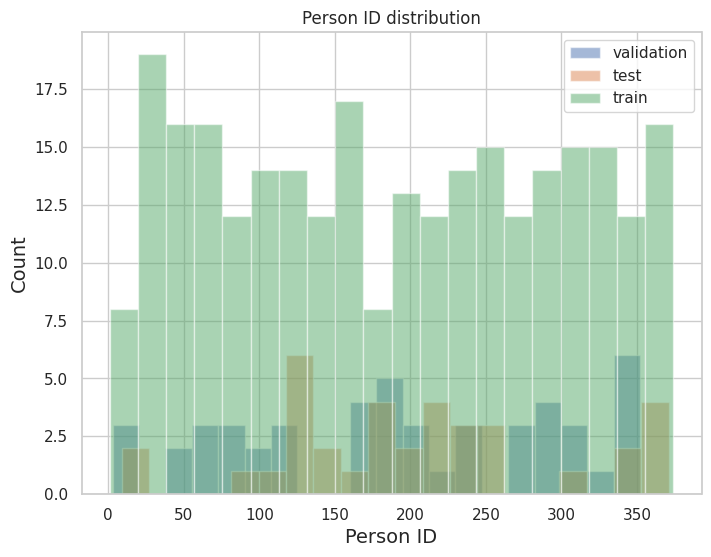

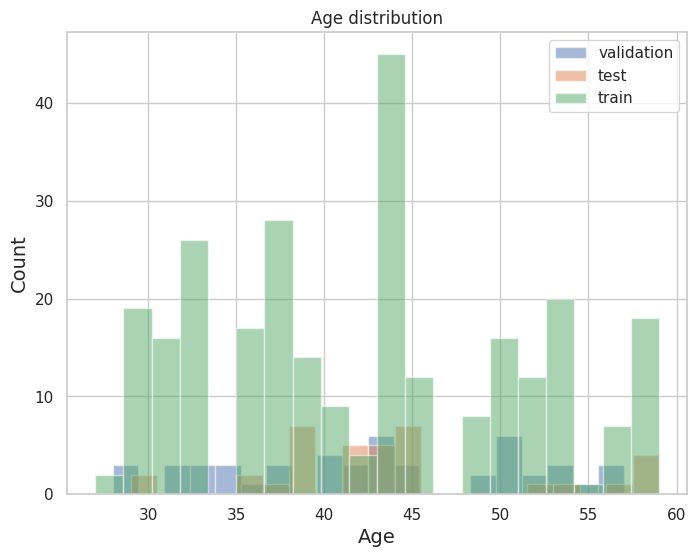

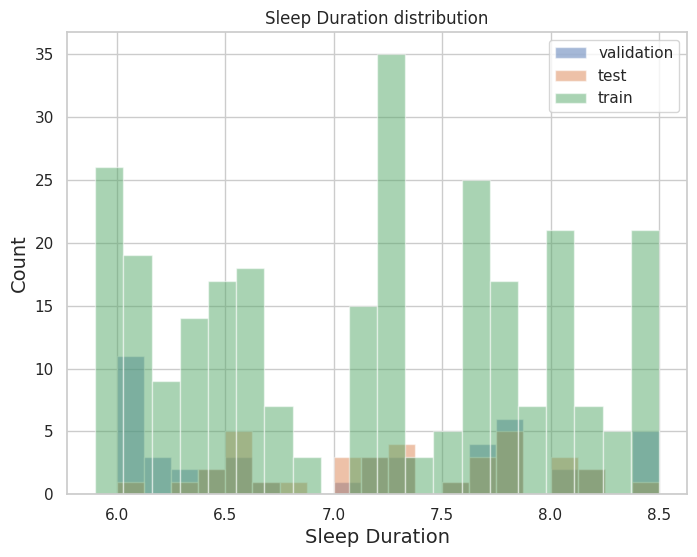

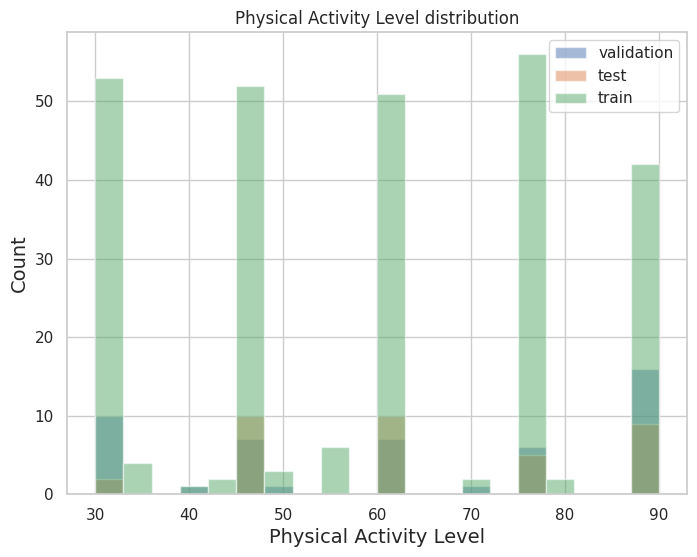

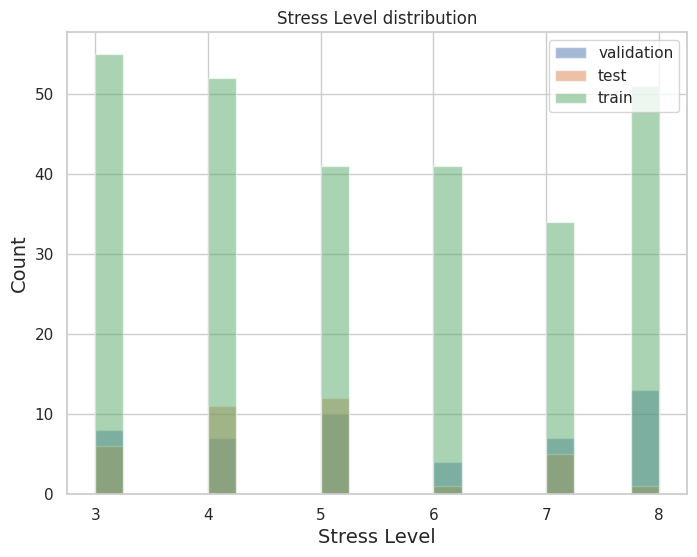

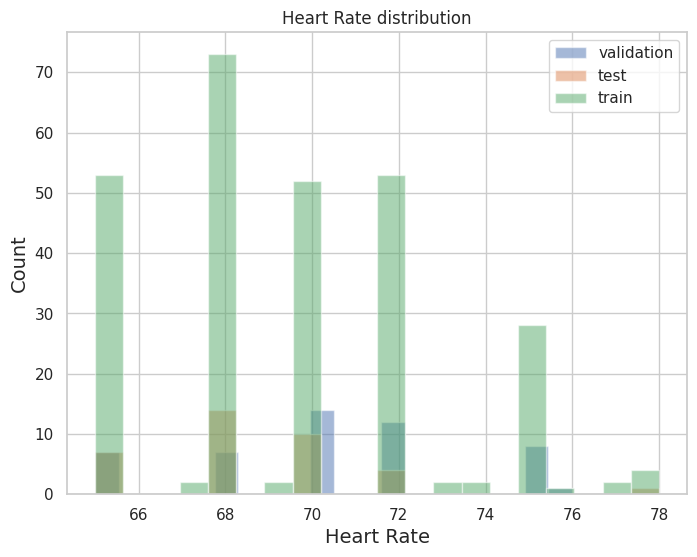

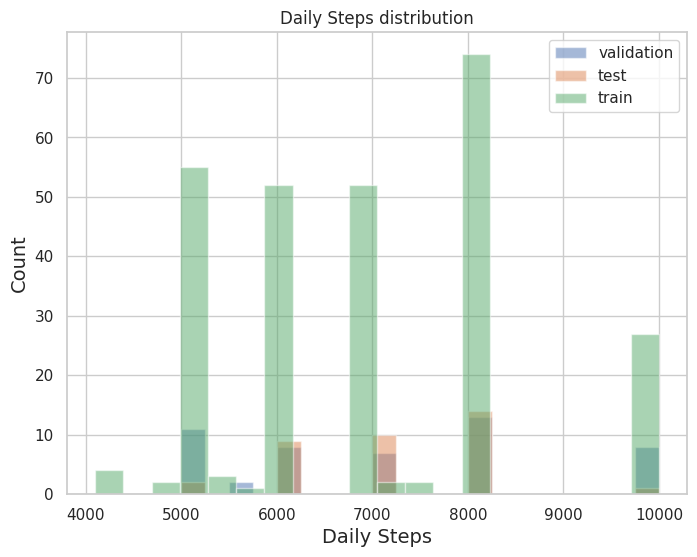

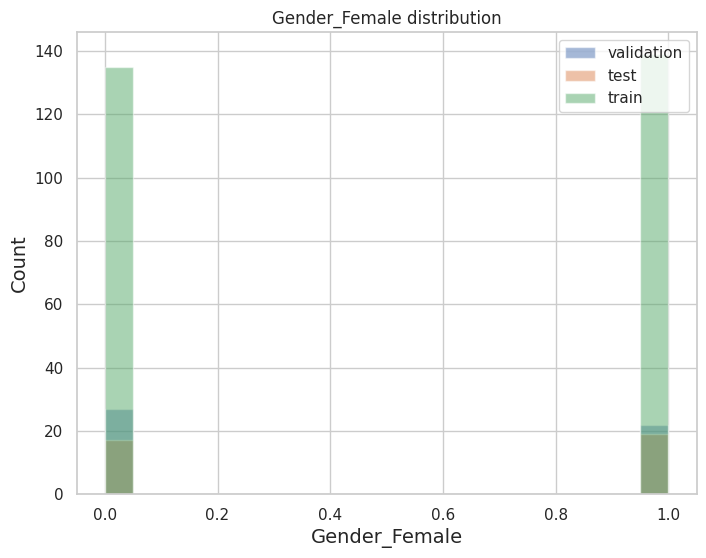

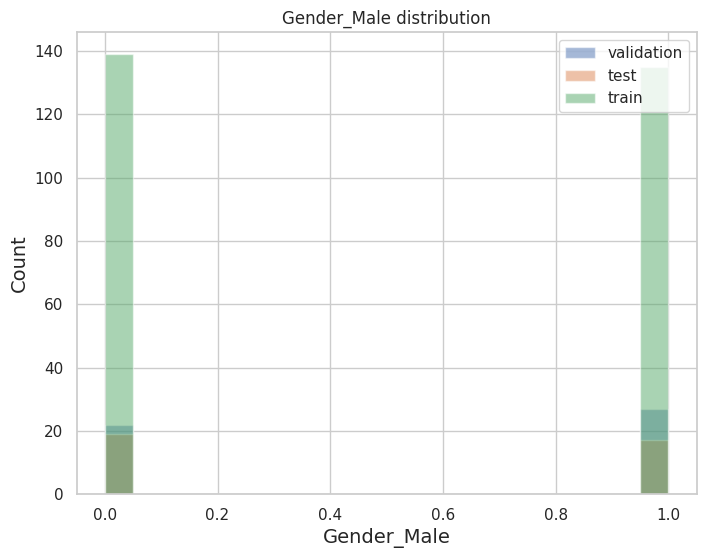

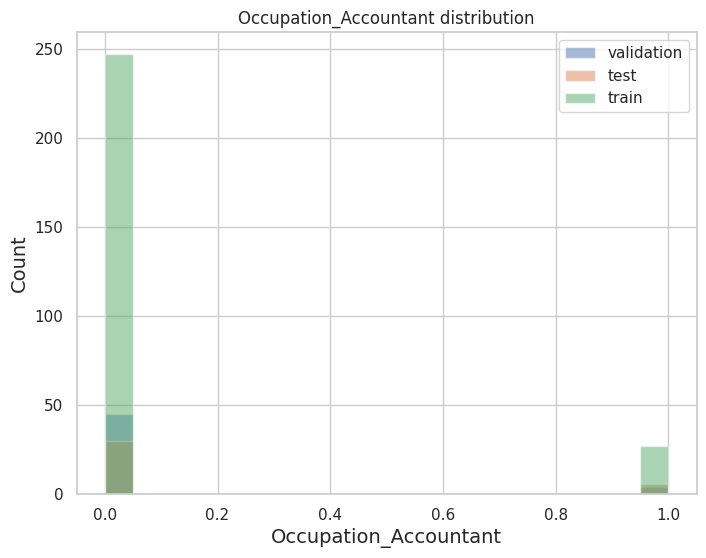

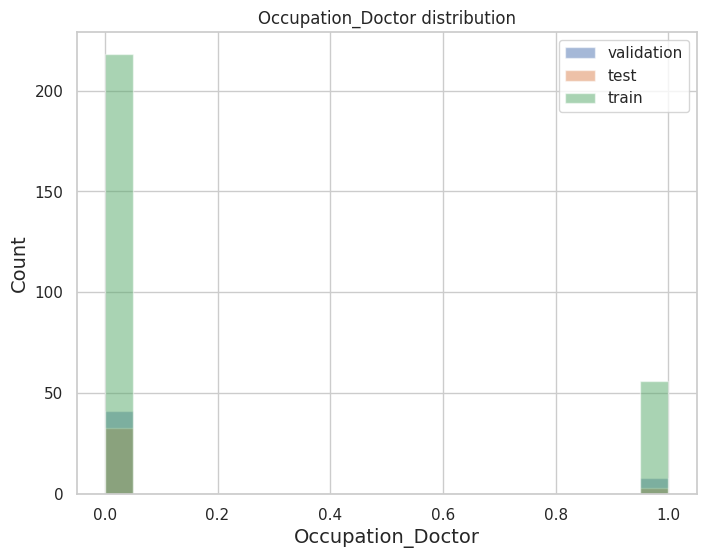

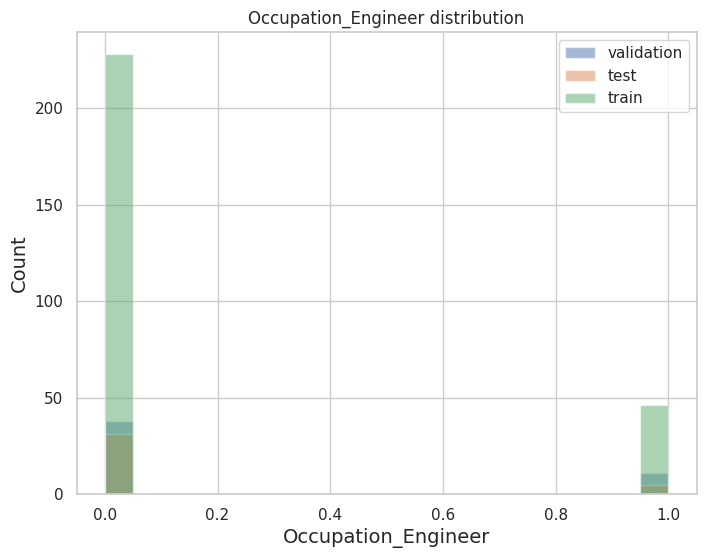

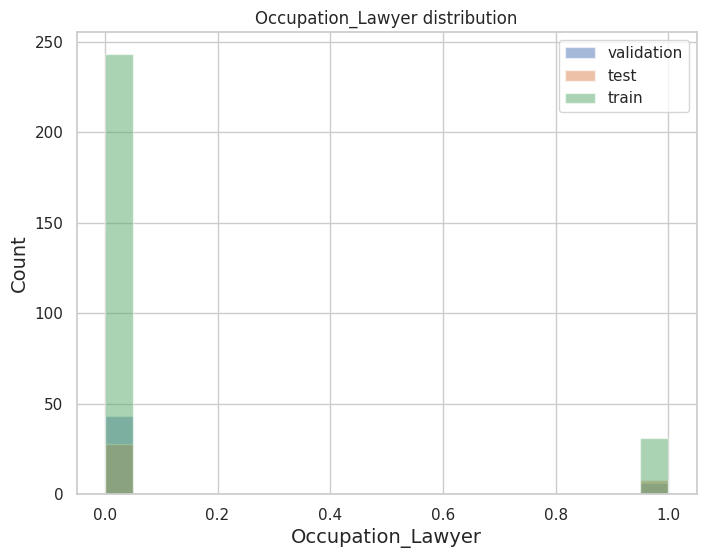

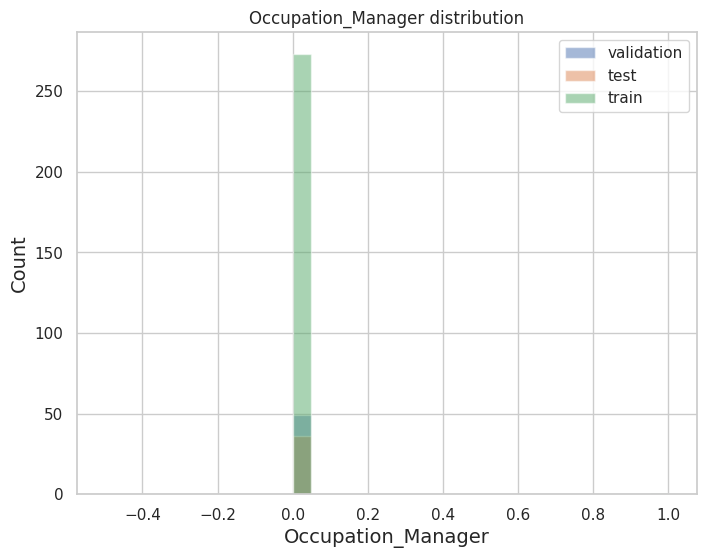

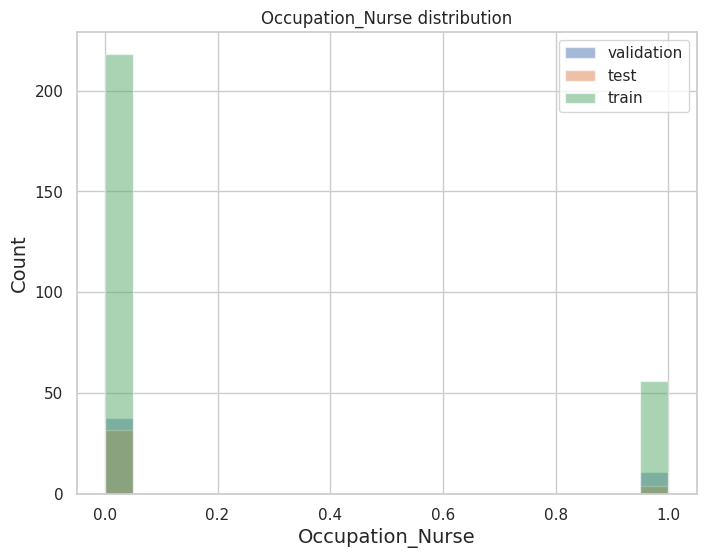

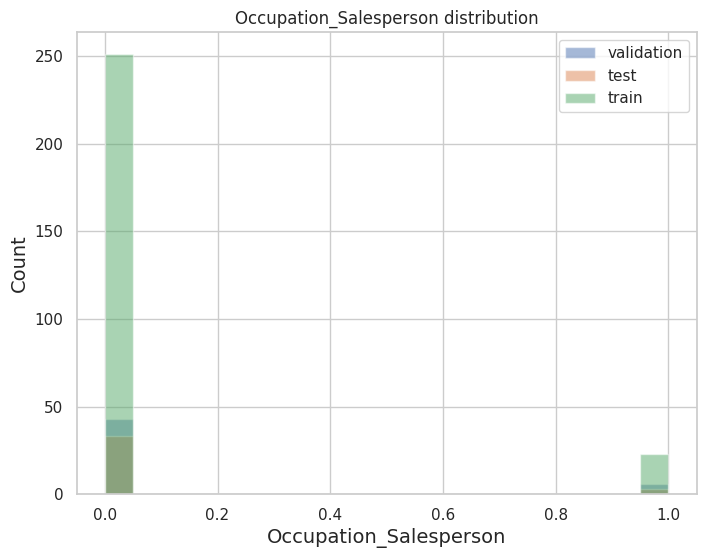

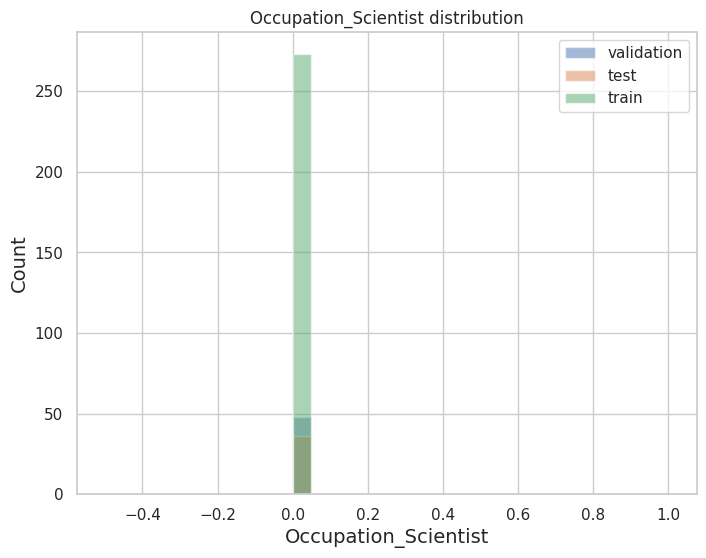

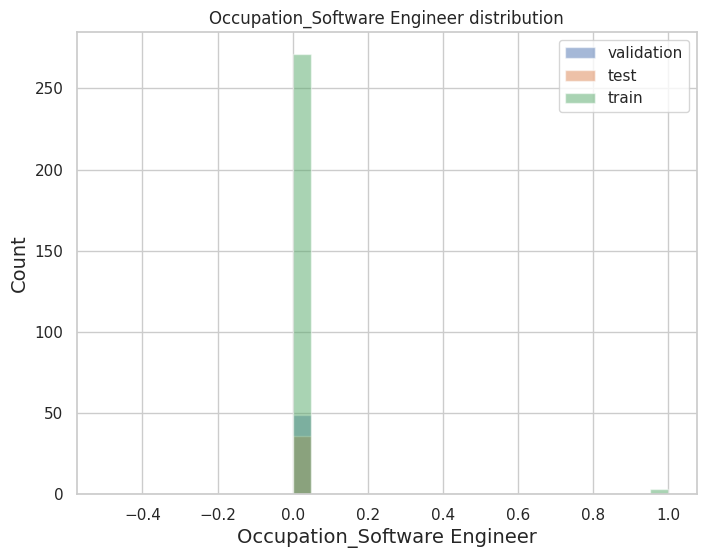

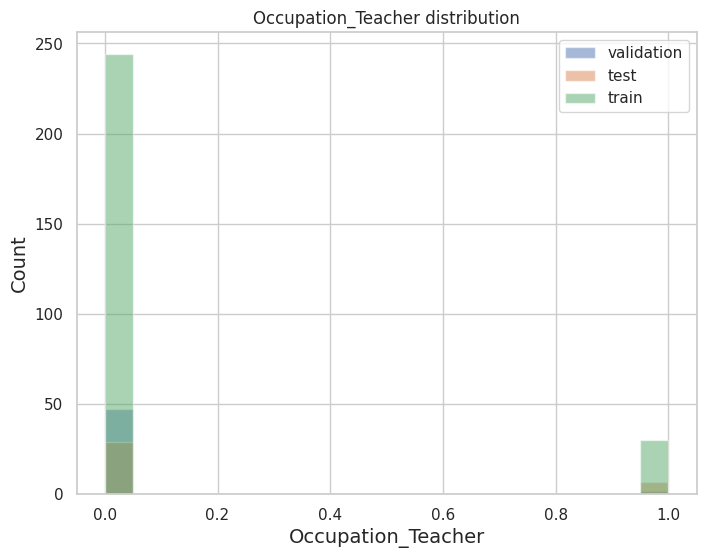

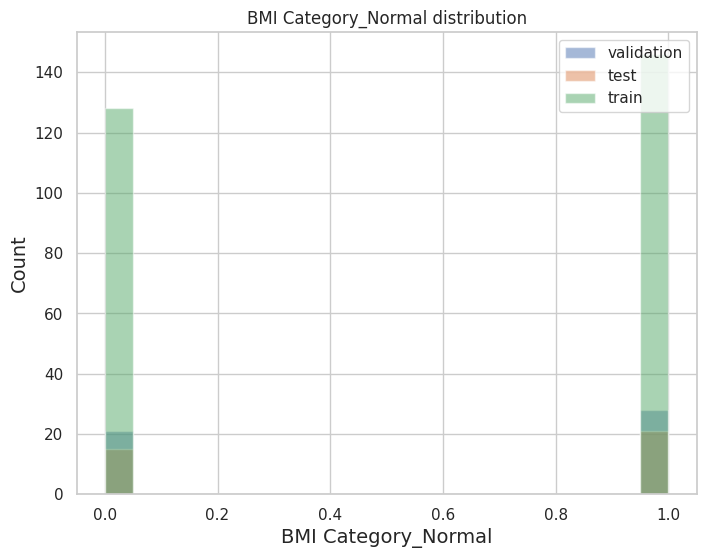

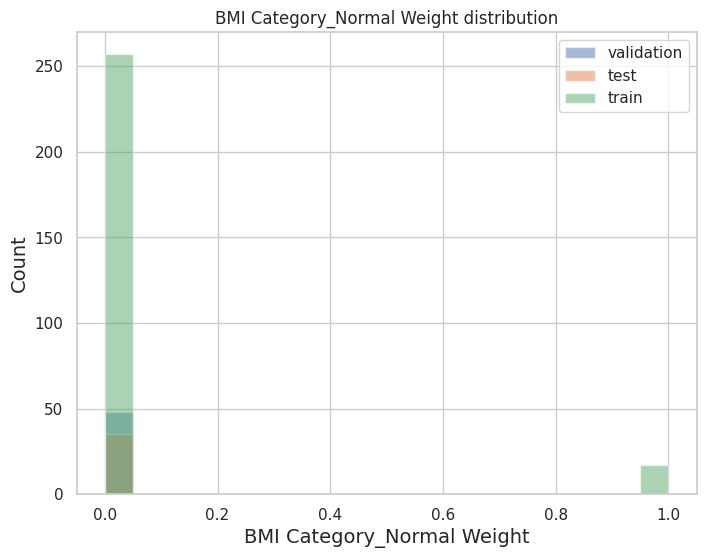

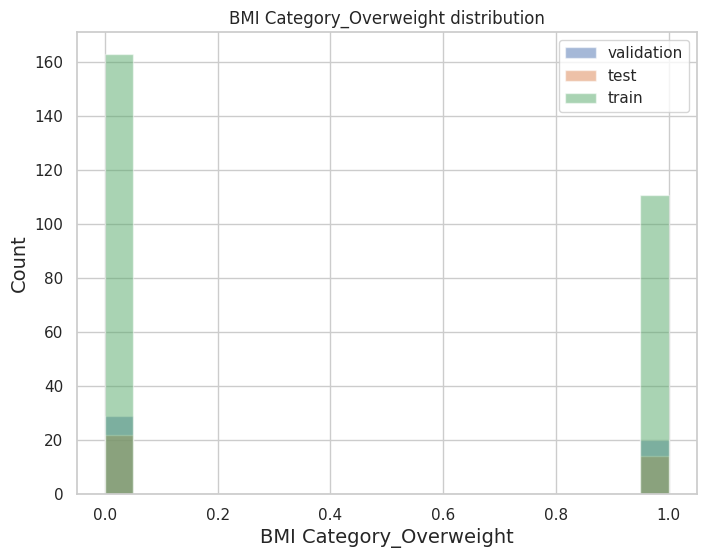

In [151]:
# Looking the data for test, training and validation set
X_test_plot = X_test[
    [
            "Person ID",
            "Age",
            "Sleep Duration",
            "Physical Activity Level",
            "Stress Level",
            "Heart Rate",
            "Daily Steps",
            "Gender_Female",
            "Gender_Male",
            "Occupation_Accountant",
            "Occupation_Doctor",
            "Occupation_Engineer",
            "Occupation_Lawyer",
            "Occupation_Manager",
            "Occupation_Nurse",
            "Occupation_Salesperson",
            "Occupation_Scientist",
            "Occupation_Software Engineer",
            "Occupation_Teacher",
            "BMI Category_Normal",
            "BMI Category_Normal Weight",
            "BMI Category_Overweight"
    ]
]

X_val_plot = X_val[
    [
            "Person ID",
            "Age",
            "Sleep Duration",
            "Physical Activity Level",
            "Stress Level",
            "Heart Rate",
            "Daily Steps",
            "Gender_Female",
            "Gender_Male",
            "Occupation_Accountant",
            "Occupation_Doctor",
            "Occupation_Engineer",
            "Occupation_Lawyer",
            "Occupation_Manager",
            "Occupation_Nurse",
            "Occupation_Salesperson",
            "Occupation_Scientist",
            "Occupation_Software Engineer",
            "Occupation_Teacher",
            "BMI Category_Normal",
            "BMI Category_Normal Weight",
            "BMI Category_Overweight"
    ]
]

X_train_plot = X_train[
    [
            "Person ID",
            "Age",
            "Sleep Duration",
            "Physical Activity Level",
            "Stress Level",
            "Heart Rate",
            "Daily Steps",
            "Gender_Female",
            "Gender_Male",
            "Occupation_Accountant",
            "Occupation_Doctor",
            "Occupation_Engineer",
            "Occupation_Lawyer",
            "Occupation_Manager",
            "Occupation_Nurse",
            "Occupation_Salesperson",
            "Occupation_Scientist",
            "Occupation_Software Engineer",
            "Occupation_Teacher",
            "BMI Category_Normal",
            "BMI Category_Normal Weight",
            "BMI Category_Overweight"
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

* There are no missing values in the occupation and gender columns.

# **Data Modelling**

## Linear Regression Model:



In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.9725564754346365


**R square significance:** Plotting R-squared (R²) values helps us see how well a regression model fits the data. R² is like a score that tells us how much the independent variables (the factors we're considering) can explain the changes in the dependent variable (the outcome we're trying to predict). The higher the R², the better the model is at predicting the outcome based on the factors we've chosen.

Our R² value is 0.9725 which indicates that about 97.25% of the changes or differences we see in the outcome we're trying to predict (dependent variable) can be explained by the factors we've considered in our model (independent variables). The model does a very good job of capturing and understanding why the outcomes vary.

It is also important that we consider plotting the residual plot and do the bias-variance analysis.

**Residual Plots**
* Can reveal whether the variance of the errors is constant across all predicted values(Homoscedasticity).
* Can verify if the relationship between the predictors and the dependent variable is adequately captured by the linear model. Patterns in the residuals may suggest non-linearity or omitted variables. (Linearity check)
* Outliers or influential data points can be identified by examining the residuals plot. These points may disproportionately influence the model's fit.

**Bias Variance Analysis**
* Underfitting (High Bias): It's like telling a story so briefly that you miss important details. Your model is too simple, and it doesn't grasp the complexities in the data.
* Overfitting (High Variance): On the other hand, it's like telling a story with so many specific details that it only makes sense to you. Your model is too complex, capturing noise in the data rather than the actual patterns.

The challenge is finding the sweet spot—enough detail to tell the story accurately without getting lost in unnecessary specifics. This balance ensures your model works well not only on the data it learned from (training data) but also on new, unseen data.

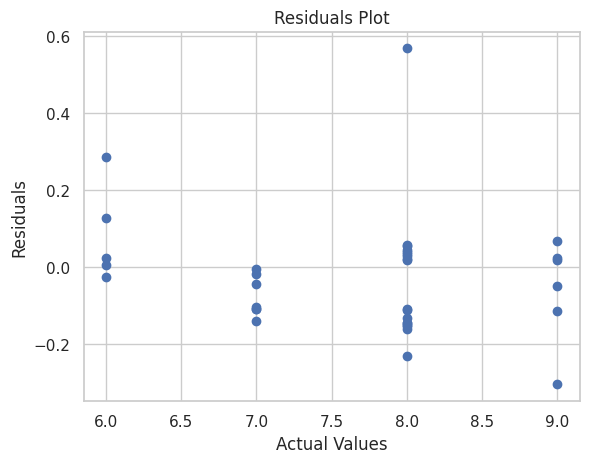

Mean Absolute Percentage Error (MAPE): 1.37%
Bias: -0.03
Variance: 0.02


In [153]:
# Calculate residuals
residuals = y_test - y_pred

# Calculate percentage error
percentage_error = (residuals / y_test) * 100

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(np.abs(percentage_error))

# Check for bias
bias = np.mean(residuals)

# Check for variance
variance = np.var(residuals)

# Visualize residuals
plt.scatter(y_test, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals') #diff between actual and predicted values
plt.title('Residuals Plot')
plt.show()

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Bias: {bias:.2f}")
print(f"Variance: {variance:.2f}")

In summary, while R-squared provides an overall measure of model fit, residuals plots and bias-variance analysis offer a deeper understanding of the model's behavior, potential shortcomings, and opportunities for improvement. They complement the evaluation process and contribute to building robust and reliable regression models.

Mean Absolute Percentage Error (MAPE): 1.37% indicates that overall the predictions we made using the linear regression model is 1.37% away from the actual values.

**Bias: -0.03** indicates that on average, the predictions are slightly underestimated by 0.03 units. A negative bias means the model tends to predict values lower than the actuals.

**Variance: 0.02** indicates that the predictions have a variance of 0.02, indicating a moderate level of variability around the mean prediction. Lower variance suggests more consistent predictions.


Small MAPE value indicates overall good accuracy. but its always a tradeoff between accuracy, bias and variability and the specific context of the problem will indicate if the metrics are accepteble or not.




In [154]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)




Mean squared error: 0.04
Coefficient of determination: 0.97
R^2 score on tarining set = 0.9700243041516098
Mean squared error: 0.02
Coefficient of determination: 0.97
R^2 score on test set = 0.9725564754346365
Mean squared error: 0.04
Coefficient of determination: 0.97
R^2 score on validation set = 0.9691265059348215


In [157]:
# Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.9825 ± 0.3024,Age
0.5293 ± 0.2049,Stress Level
0.1237 ± 0.0411,Person ID
0.0756 ± 0.0191,BMI Category_Overweight
0.0608 ± 0.0176,Sleep Duration
0.0432 ± 0.0207,Occupation_Salesperson
0.0361 ± 0.0139,Gender_Male
0.0332 ± 0.0219,Gender_Female
0.0330 ± 0.0202,Occupation_Accountant
0.0279 ± 0.0199,BMI Category_Normal


* Age (0.9825 ± 0.3024): Age has a high positive impact on the target variable
(Quality of Sleep). The relatively large standard deviation (0.3024) suggests some variability in the impact across different data points.
* Stress Level (0.5293 ± 0.2049): Stress Level is another important positive feature, but its impact is lower than Age. The standard deviation (0.2049) indicates variability in the impact across different instances.
* Person ID (0.1237 ± 0.0411): Person ID has a positive impact, but it is not as influential as Age and Stress Level. The standard deviation (0.0411) suggests some variability.
* BMI Category_Overweight (0.0756 ± 0.0191): Being overweight (BMI Category_Overweight) has a positive impact, but it is less influential than other factors. The standard deviation (0.0191) indicates relatively low variability.
* Sleep Duration (0.0608 ± 0.0176): Sleep Duration has a positive impact, but it is less influential compared to Age and Stress Level. The standard deviation (0.0176) suggests some variability.
* Occupation_Salesperson (0.0432 ± 0.0207): Being a Salesperson has a positive impact, but the impact is lower than other factors. The standard deviation (0.0207) indicates variability.
* Gender_Male (0.0361 ± 0.0139): Being Male has a positive impact, but it is less influential than other factors. The standard deviation (0.0139) suggests some variability.

so on and forth..

## **Decision Tree Model**


Accuracy: 1.00

Confusion Matrix:
[[ 2  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0 21  0]
 [ 0  0  0  0 20]]


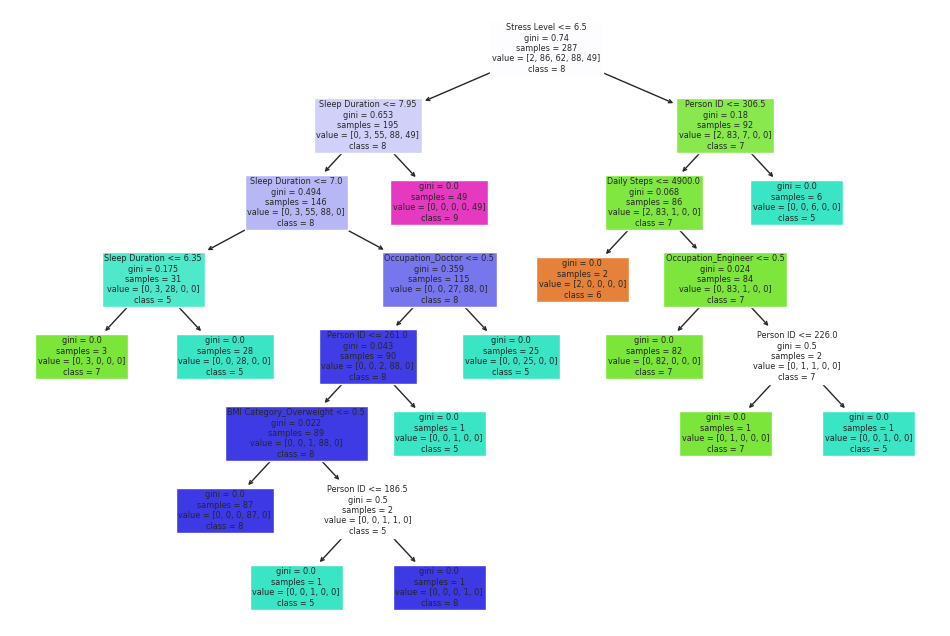

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

# df1_encoded is DataFrame with a target column 'Quality of Sleep'(X)
# and features(y) in other columns

# Separate features and target variable
X = df1_encoded.drop('Quality of Sleep', axis=1)
y = df1_encoded['Quality of Sleep']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display confusion matrix and classification report
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns.tolist(), class_names=df1_encoded['Quality of Sleep'].unique().astype(str).tolist(), filled=True)
plt.show()


Accuracy: 1.00 = from this output of decision tree model I can infer that the model achieved perfect accuracy, correctly classifying all instances.

Confusion matrix: For each class, the model made correct predictions, as there are no off-diagonal elements in the confusion matrix.

### **K-Nearest Neighbours**



In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# df1_encoded is your DataFrame with a target column 'Quality of Sleep'
# and features in other columns

# Separate features and target variable
X = df1_encoded.drop('Quality of Sleep', axis=1)
y = df1_encoded['Quality of Sleep']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k)

# Fit the classifier on the scaled training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display confusion matrix and classification report
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.94

Confusion Matrix:
[[ 0  0  2  0  0]
 [ 0 18  0  0  0]
 [ 0  0 10  1  0]
 [ 0  0  0 21  0]
 [ 0  0  0  1 19]]


Accuracy: The model achieved an accuracy of 94%, meaning it correctly classified 94% of instances.

Confusion Matrix:
Class 1: 0 instances correctly classified, 2 instances misclassified.
Class 2: 18 instances correctly classified, 0 instances misclassified.
Class 3: 10 instances correctly classified, 1 instance misclassified.
Class 4: 21 instances correctly classified, 0 instances misclassified.
Class 5: 19 instances correctly classified, 1 instance misclassified.

## **Conclusion**

The different predictive models exhibited varying degrees of accuracy. The Linear Regression model achieved an impressive accuracy of 97%, showcasing its strong ability to capture the underlying patterns in the data. The K-Nearest Neighbors (KNN) model demonstrated solid performance with an accuracy of 94%, while the Decision Tree model outperformed both with a perfect accuracy score of 100%. These results suggest that all three models can be effective choices, but the Decision Tree model stands out for its flawless classification performance.

MIT License

Copyright (c) 2024 Divi1393

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.